<a href="https://colab.research.google.com/github/Hectorsyj/prueba/blob/main/Analisis_de_Noticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 1: Preprocesamiento y Tokenización
---
En esta actividad, realizaremos los siguientes pasos:

1. Cargar el archivo de datos de noticias.
2. Realizar el preprocesamiento del texto, que incluye:
   - Convertir el texto a minúsculas.
   - Eliminar puntuación.
   - Eliminar números.
   - Eliminar espacios en blanco adicionales.
3. Tokenizar el texto en palabras individuales.
4. Eliminar stop words del texto tokenizado.
5. Calcular TF-IDF para representar el texto como vectores numéricos.
6. Generar embeddings de palabras utilizando Word2Vec.


## Librerías

Para esta actividad, necesitaremos las siguientes librerías:

- pandas: Para cargar y manipular los datos.
- numpy: Para realizar operaciones numéricas.
- nltk: Para realizar el preprocesamiento y tokenización del texto.
- gensim: Para generar los embeddings de palabras.

Este proyecto usa Python 3.10 y usa poetry para manejar las dependencias. Para instalar las dependencias, ejecute `poetry install` en la carpeta raíz del proyecto. Para más información sobre poetry, consulte la [documentación oficial](https://python-poetry.org/docs/).

Si no quiere usar poetry, puede instalar las dependencias manualmente usando pip:

```bash
pip install pandas numpy scikit-learn nltk gensim scipy openpyxl
```

In [ ]:
pip install pandas numpy scikit-learn nltk gensim scipy openpyxl

### NLTK

Nltk requiere que descarguemos algunos recursos adicionales. Para hacerlo, ejecute el siguiente código:

```python
import nltk
nltk.download('punkt')
nltk.download('stopwords')
```

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Cargar el archivo de datos
# file_path = '../../Datos/Datos Crudos/Noticias.xlsx'
file_path = 'Noticias.xlsx'
data = pd.read_excel(file_path)

# Mostrar una vista previa de los datos
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Columna1,Enlaces,Título,info,contenido,Etiqueta
0,0,https://www.eltiempo.com/agresion-contra-un-op...,Operador de grúa quedó inconsciente tras agres...,El conductor de una moto le lanzó el casco y p...,Las autoridades están buscando al conductor de...,colombia
1,1,https://www.eltiempo.com/archivo/documento/CMS...,"Usaquén, primera en infracciones por mal parqueo",La localidad ocupa el primer lugar en comparen...,"""Los andenes son para los peatones"", reclama e...",archivo
2,2,https://www.eltiempo.com/archivo/documento/CMS...,'Me atracaron y vi un arma que me heló la sang...,Un ciudadano relata cómo cuatro hombres lo rob...,A las 7 de la noche me había quedado de encont...,archivo
3,3,https://www.eltiempo.com/archivo/documento/CMS...,"Escoltas mal estacionados, dolor de cabeza de ...",Las zonas de restaurantes se convierten en par...,Atravesados. Eso es lo que se les pasa por la ...,archivo
4,4,https://www.eltiempo.com/archivo/documento/CMS...,Radicado primer proyecto que autorizaría union...,"El representante de 'la U', Miguel Gómez, dijo...",“Estamos proponiendo la figura de un contrato ...,archivo


Analisis exploratorio

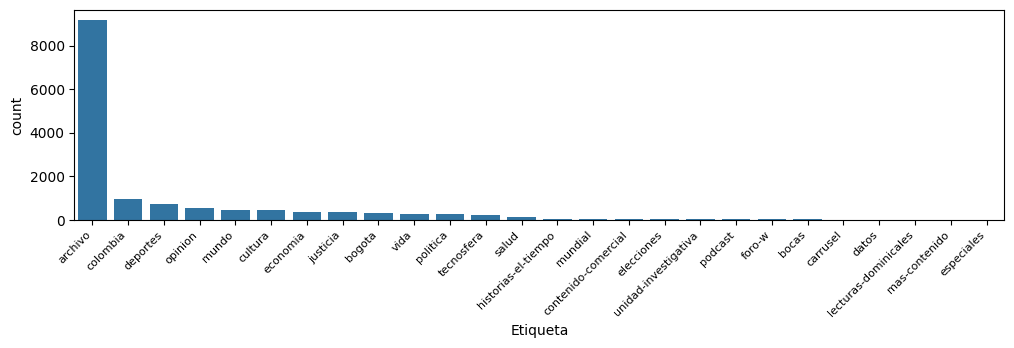

No tendremos en cuenta la etiqueta de archivo ya que esta no tiene significancia


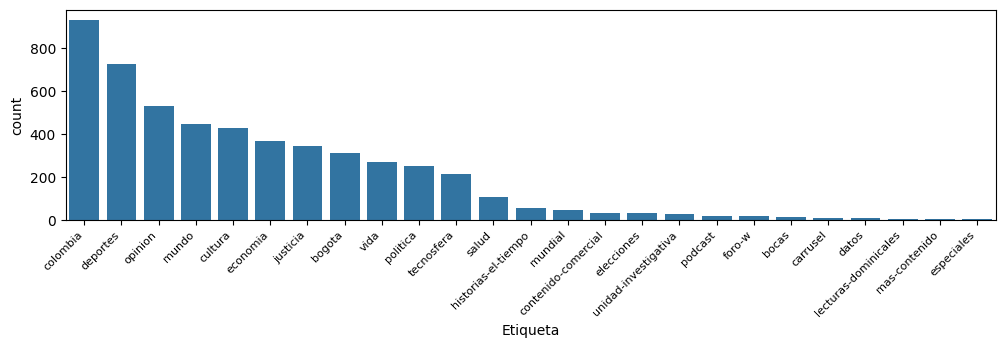

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
category_counts = data['Etiqueta'].value_counts().index.tolist()
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.countplot(x='Etiqueta', data=data, order=category_counts)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

print('No tendremos en cuenta la etiqueta de archivo ya que esta no tiene significancia')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 2)
data2= data[data['Etiqueta'] != 'archivo']
category_counts = data2['Etiqueta'].value_counts().index.tolist()
sns.countplot(x='Etiqueta', data=data2, order=category_counts)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

## Ahora solo tomaremos las Etiquetas de deportes, cultura, economía y justicia.

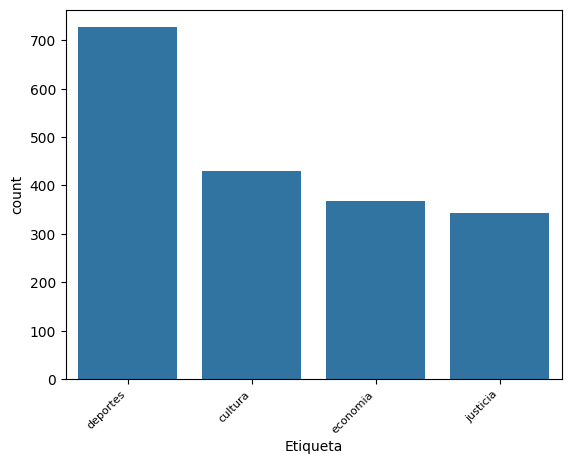

In [ ]:
filt_etie = ['deportes', 'cultura', 'economia', 'justicia']
data2= data[data['Etiqueta'].isin(filt_etie)]

category_counts = data2['Etiqueta'].value_counts().index.tolist()
sns.countplot(x='Etiqueta', data=data2, order=category_counts)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

## Analisis  de distrubucion igualitaria

In [1]:
import numpy as np
distr_etiq = data2['Etiqueta'].value_counts()
tot_eti = np.sum(distr_etiq)
por_etiq = [numero / tot_eti for numero in distr_etiq]

def in_gini(df):
    gini = sum(x * (1 - x) for x in df)
    return gini
#evaluacion de la Proporcion

if  np.sum(por_etiq)== 1:
    print(f"El vector de proporcion suma {np.sum(por_etiq)} ,por lo que puede ser usado para calcular el indice de Gini\n")
    print(f"Para el caso del vector\n {por_etiq}\n se obtiene un Indice de gini {round(in_gini(por_etiq),3)}\n")
    x =0
    vect =[]
    for x in range(len(por_etiq)):
        vect.append(1/len(por_etiq))
        x= x+1
    print(f"Un indice optimo para estas {len(por_etiq)} etiquetas es de {round(in_gini(vect),3)}\n Por lo que comparativamente con la distribucion de las etiquetas escogidas el indice de gini no es muy distante, por lo que podemos usar este Dataframe filtrado para entrenal los modelos")


NameError: name 'data2' is not defined

## Paso 1: Preprocesamiento del Texto

En este paso, transformaremos el texto a minúsculas, eliminaremos la puntuación, los números y los espacios en blanco adicionales.

In [ ]:
# Función para preprocesar texto
def preprocess_text(text):
    """
    Esta función realiza el preprocesamiento del texto.
    1. Convierte el texto a minúsculas.
    2. Elimina la puntuación.
    3. Elimina los números.
    4. Elimina los espacios en blanco adicionales.

    Parámetros:
    text (str): El texto original.

    Retorna:
    str: El texto preprocesado.
    """
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar números
    text = re.sub(r'\d+', '', text)
    # Eliminar espacios en blanco adicionales
    text = text.strip()
    # reemplazar las tildes de los textos
    text= text.replace('á', 'a')
    text= text.replace('é', 'e')
    text= text.replace('í','o').replace('ó', 'o')
    text= text.replace('ú', 'u')
    return text

# Aplicar preprocesamiento al contenido
## Deben eliminarse los valores nulos antes de aplicar el preprocesamiento
data2 = data.dropna(subset=['contenido'])

# Aplicar preprocesamiento al contenido
data2['contenido_preprocesado'] = data2['contenido'].apply(preprocess_text)

# Mostrar una vista previa de los datos preprocesados
display(data2[['contenido', 'contenido_preprocesado']].head())

# Dimensiones de los datos

print(f'Dimensiones de los datos: {data2.shape}')



,contenido,contenido_preprocesado
0,Las autoridades están buscando al conductor de...,las autoridades están buscando al conductor de...
1,"""Los andenes son para los peatones"", reclama e...",los andenes son para los peatones reclama enfá...
2,A las 7 de la noche me había quedado de encont...,a las de la noche me había quedado de encontr...
3,Atravesados. Eso es lo que se les pasa por la ...,atravesados eso es lo que se les pasa por la c...
4,“Estamos proponiendo la figura de un contrato ...,“estamos proponiendo la figura de un contrato ...


Dimensiones de los datos: (13738, 7)


## Paso 2: Tokenización

En este paso, convertiremos el texto preprocesado en una lista de palabras individuales utilizando la tokenización.

In [ ]:
# Tokenización
data2['tokens'] = data2['contenido_preprocesado'].apply(word_tokenize)

# Mostrar una vista previa de los tokens
data2[['contenido_preprocesado', 'tokens']].head()

,contenido_preprocesado,tokens
0,las autoridades están buscando al conductor de...,"[las, autoridades, están, buscando, al, conduc..."
1,los andenes son para los peatones reclama enfá...,"[los, andenes, son, para, los, peatones, recla..."
2,a las de la noche me había quedado de encontr...,"[a, las, de, la, noche, me, había, quedado, de..."
3,atravesados eso es lo que se les pasa por la c...,"[atravesados, eso, es, lo, que, se, les, pasa,..."
4,“estamos proponiendo la figura de un contrato ...,"[“, estamos, proponiendo, la, figura, de, un, ..."


In [ ]:
## Revise los tokens para asegurarse de que el texto se haya tokenizado correctamente

print("Contenido preprocesado: ", data2['contenido_preprocesado'][10487])
print("Tokens: ", data2['tokens'][10487])

Contenido preprocesado:  las autoridades están buscando al conductor de una moto que le lanzó el casco a carlos alberto carmona operador de grúa de la empresa segrup  quien perdió por una hora el conocimiento tras la agresión en un video quedó registrado el momento en el que tanto el trabajador de la empresa como el motociclista se encuentran discutiendo cerca de la avenida villavicencio con gaitán cortés en el acalorado encuentro verbal ambos amagan con golpearse con los objetos que tienen en sus manos entonces el conductor de la moto arroja su casco contra el operador el hombre recibe el impacto en su cara por lo que s e desgonza y en la caída se golpea la cabeza con la grúa que conduce  el agredido perdió el conocimiento por cerca de una hora en ese instante el agresor se retira caminando del lugar y en repetidas ocasiones mira para atrás en donde está el operador en el suelo luego su compañero agarra la moto y huye del lugar y a pocos metros recoge al agresor las autoridades buscan

## Paso 3: Eliminación de Stop Words

En este paso, eliminaremos las stop words de los tokens generados.

In [ ]:
# Eliminar stop words
stop_words = set(stopwords.words('spanish'))
data2['tokens_sin_stopwords'] = data2['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Mostrar una vista previa de los tokens sin stop words
data2[['tokens', 'tokens_sin_stopwords']].head()

,tokens,tokens_sin_stopwords
0,"[las, autoridades, están, buscando, al, conduc...","[autoridades, buscando, conductor, moto, lanzó..."
1,"[los, andenes, son, para, los, peatones, recla...","[andenes, peatones, reclama, enfática, carmenz..."
2,"[a, las, de, la, noche, me, había, quedado, de...","[noche, quedado, encontrar, boris, siempre, si..."
3,"[atravesados, eso, es, lo, que, se, les, pasa,...","[atravesados, pasa, cabeza, residentes, transe..."
4,"[“, estamos, proponiendo, la, figura, de, un, ...","[“, proponiendo, figura, contrato, civil, unió..."


## Paso 4: Cálculo de TF-IDF

En este paso, calcularemos la representación TF-IDF de los textos preprocesados. TF-IDF (Term Frequency-Inverse Document Frequency) es una técnica que pondera la importancia de una palabra en un documento en relación con un corpus.

In [ ]:
# Unir los tokens en una sola cadena de texto para cada documento
data2['texto_sin_stopwords'] = data2['tokens_sin_stopwords'].apply(lambda tokens: ' '.join(tokens))

# Calcular TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data2['texto_sin_stopwords'])

# Convertir la matriz TF-IDF a un DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Mostrar una vista previa de la matriz TF-IDF
tfidf_df.head()

,aa,aaa,aaacpt,aaah,aaas,aac,aacsb,aacta,aademás,aage,...,𝑓𝑖𝑗𝑜𝑠,𝑙𝑎,𝑚𝑎𝑟𝑐𝑜,𝑚𝑖𝑒𝑚𝑏𝑟𝑜𝑠,𝑚𝑢𝑒𝑠𝑡𝑟𝑎,𝑝𝑐𝑒𝑙𝑢𝑙𝑎𝑟,𝑝𝑒𝑟𝑠𝑜𝑛𝑎,𝑝𝑒𝑟𝑠𝑜𝑛𝑎𝑠,𝑝𝑓𝑖𝑗𝑜,𝑝𝑖
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### ¿Qué ganamos con TF-IDF?

- **Frecuencia de término (TF)**: Mide la frecuencia de una palabra en un documento. Si una palabra aparece muchas veces en un documento, es probable que sea importante para ese documento.
- **Frecuencia inversa de documento (IDF)**: Mide la rareza de una palabra en un corpus. Si una palabra es común en muchos documentos, es menos informativa que una palabra rara.

La fórmula de TF-IDF es:

$$ \text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t) $$

Donde:

- $\text{TF}(t, d)$ es la frecuencia de la palabra $t$ en el documento $d$.
- $\text{IDF}(t)$ es la frecuencia inversa de documento de la palabra $t$ en el corpus.

pero, que fue lo que hicimos, en resumen, con TF-IDF, convertimos el texto en vectores numéricos que representan la importancia de las palabras en el texto.

In [ ]:
# Información adicional
lista_contenido= data2['contenido_preprocesado'][10487].split()
# Incluimos \n cada 15 palabras para mejorar la legibilidad

lista_contenido= [f"{word} " if (i+1)%15!=0 else f"{word}\n" for i, word in enumerate(lista_contenido)]

## Ahora convertimos la lista en un string

contenido= ''.join(lista_contenido)

text_info= f"""En este ejemplo particular tomamos el contenido:

{contenido}

Y lo convertimos en un vector TF-IDF de {tfidf_df.shape[1]} dimensiones:

{tfidf_df.iloc[0]}.


Acabamos de convertir un documento de texto en un vector numérico que puede ser
utilizado en algoritmos de aprendizaje automático. Ese vector representa la importancia
de cada palabra en el documento original y nos permite usar por ejemplo:

- ACP para reducir la dimensionalidad del vector.
- Clustering para agrupar documentos similares.
- Clasificación para predecir la categoría de un documento.
- Recuperación de información para encontrar documentos similares.

"""

print(text_info)



En este ejemplo particular tomamos el contenido:

las autoridades están buscando al conductor de una moto que le lanzó el casco a
carlos alberto carmona operador de grúa de la empresa segrup quien perdió por una hora
el conocimiento tras la agresión en un video quedó registrado el momento en el que
tanto el trabajador de la empresa como el motociclista se encuentran discutiendo cerca de la
avenida villavicencio con gaitán cortés en el acalorado encuentro verbal ambos amagan con golpearse con
los objetos que tienen en sus manos entonces el conductor de la moto arroja su
casco contra el operador el hombre recibe el impacto en su cara por lo que
s e desgonza y en la caída se golpea la cabeza con la grúa que
conduce el agredido perdió el conocimiento por cerca de una hora en ese instante el
agresor se retira caminando del lugar y en repetidas ocasiones mira para atrás en donde
está el operador en el suelo luego su compañero agarra la moto y huye del
lugar y a pocos metros recoge al agresor

## Paso 5: Generación de Embeddings de Palabras con Word2Vec

En este paso, utilizaremos el modelo Word2Vec para generar embeddings de palabras. Los embeddings de palabras son representaciones vectoriales densas que capturan el significado semántico de las palabras.

In [ ]:
# Entrenar el modelo Word2Vec
word2vec_model = Word2Vec(sentences=data['tokens_sin_stopwords'], vector_size=100, window=5, min_count=1, workers=4)

# Obtener los embeddings de una palabra ejemplo
word_example = 'noticia'
if word_example in word2vec_model.wv:
    embedding_example = word2vec_model.wv[word_example]
    print(f'Embedding de la palabra "{word_example}":\n{embedding_example}')
else:
    print(f'La palabra "{word_example}" no está en el vocabulario del modelo Word2Vec.')

# Guardar el modelo Word2Vec
#word2vec_model.save("../../Datos/Embeddings/word2vec.model")

Embedding de la palabra "noticia":
[-0.99447083 -0.5259311  -1.1926998  -0.2702466  -1.1873838  -1.8121207
 -0.55257326  1.3382349  -0.42195955 -0.55521196  0.4787058   0.18520263
  0.39731753 -0.504411   -0.56780773 -0.00601611  0.3699425   0.32554802
  0.13248032 -0.2779204   0.8995723   0.98829    -0.8213873   0.21855067
 -0.51834947  0.20636113 -1.6283885  -0.68916315  0.08982611  1.0831406
  0.10754961  0.5339474  -0.3811269  -0.49245268 -0.18058549  0.68988717
 -0.71532834  0.3871181   0.06251367 -1.2122092  -0.84653956 -0.09961714
  0.5826205  -0.34036943  0.35555866 -0.15712725  0.8328741   1.0130358
  0.11806116 -0.49984577  0.27877864  0.18018723  0.93960965 -0.5521378
 -0.673504    0.13741465  0.8340671   0.31952417  1.1473676   1.3255506
  0.37010503  0.15626635 -0.17371327 -0.12150726  0.7560544   1.3405061
 -0.24695852 -0.00818564 -0.15814269 -0.08997288 -0.82679224 -0.0791149
 -0.5045689  -0.14355788 -0.48369262  0.285147    0.15289938  0.6837976
  0.36260232 -0.50167334

## Guardar Resultados

Finalmente, guardaremos los resultados preprocesados en un archivo CSV para su posterior uso.

In [ ]:
# Guardar los resultados preprocesados
data.to_csv('../../Datos/Datos Preprocesados/Noticias_preprocesadas.csv', index=False)

## Ejercicio

### Ajuste Ejercicio

Hemos creado dos modelos de vectorización de palabras, uno basado en TF-IDF y otro basado en Word2Vec. Su primera tarea es:

1. Eliminar las palabras vacías del texto.
2. Calcular la representación TF-IDF de los textos preprocesados.
3. Generar embeddings de palabras utilizando Word2Vec.

Para la representación TF-IDF, utilice unigramas y bigramas con un rango de frecuencia de 0.1 a 0.9. Para Word2Vec, utilice un tamaño de ventana de 5 y un tamaño de vector de 100.

Finalmente, guarde los resultados en un archivo CSV.

### Crear un Modelo Simple de ACP y Clustering

Después de generar los vectores de palabras, su segunda tarea es crear un modelo simple de ACP (Análisis de Componentes Principales) y aplicar clustering a los vectores generados. Utilice el algoritmo KMeans con 5 clusters.

PASOS:

1. Ajuste un modelo de ACP a los vectores generados.
2. Ajuste un modelo de KMeans con 5 clusters a los componentes principales.
3. Analice los resultados del clustering y determine si los clusters son significativos.

### Preguntas

1. ¿Qué puede inferir de los clusters generados?
2. ¿Qué palabras son las más representativas de cada cluster?
3. ¿Qué palabras tienen los embeddings más similares?
